In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = (10, 5)

In [134]:
house = pd.read_csv("./datasets/housing.csv")

In [135]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [136]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [137]:
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [138]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


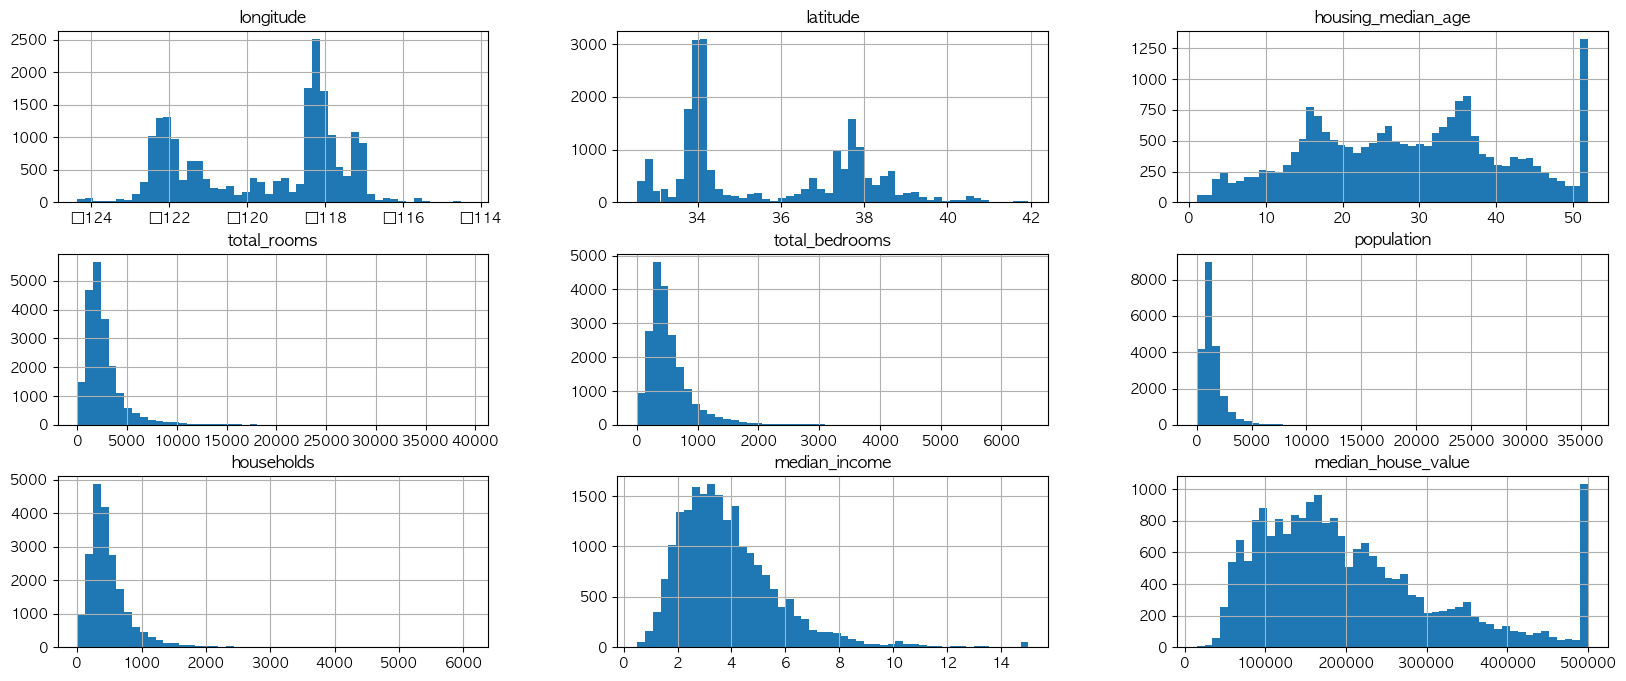

In [139]:
house.hist(bins=50, figsize=(20,8))
plt.show()

In [140]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [141]:
np.random.seed(42)

In [142]:
train_set, test_set = shuffle_and_split_data(house, 0.2)

In [143]:
len(train_set)

16512

In [144]:
len(test_set)

4128

In [145]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id : is_id_in_test_set(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [146]:
housing_with_id = house.reset_index()

In [147]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [148]:
housing_with_id['id'] = house['longitude'] * 1000 + house['latitude']

In [149]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'id')

In [150]:
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)

In [151]:
# np.inf는 끝이 정해지지 않았을때 사용하여 모든 값이 포함 될 수 있도록 하는 함수이다.
house['income_cat'] = pd.cut(house['median_income'], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

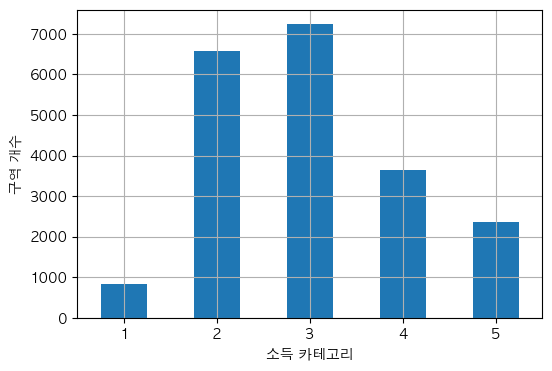

In [152]:
house['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(6,4))

plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

In [153]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(house, house['income_cat']):
    strat_train_set_n = house.iloc[train_index]
    strat_test_set_n = house.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [154]:
strat_train_set, strat_test_set = strat_splits[0]

In [155]:
strat_train_set, strat_test_set = train_test_split(house, test_size=0.2, stratify=house['income_cat'], random_state=42)

In [156]:
strat_test_set['income_cat'].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [157]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis= 1, inplace=True)

In [158]:
housing = strat_train_set.copy()

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


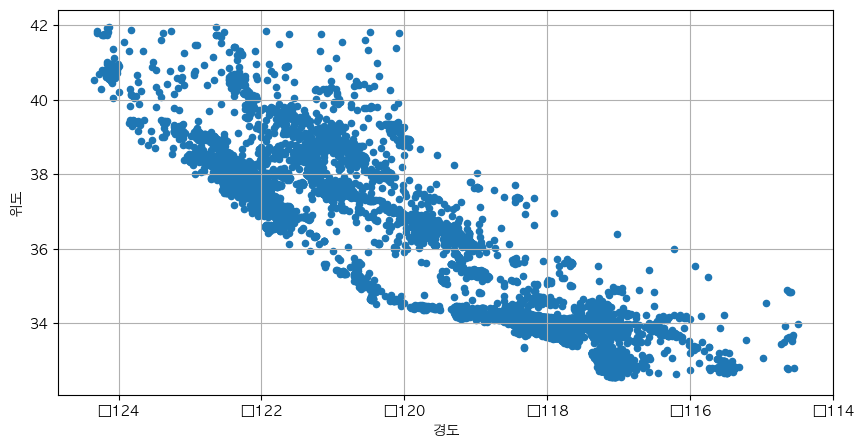

In [159]:
housing.plot(kind='scatter', x="longitude", y='latitude', grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


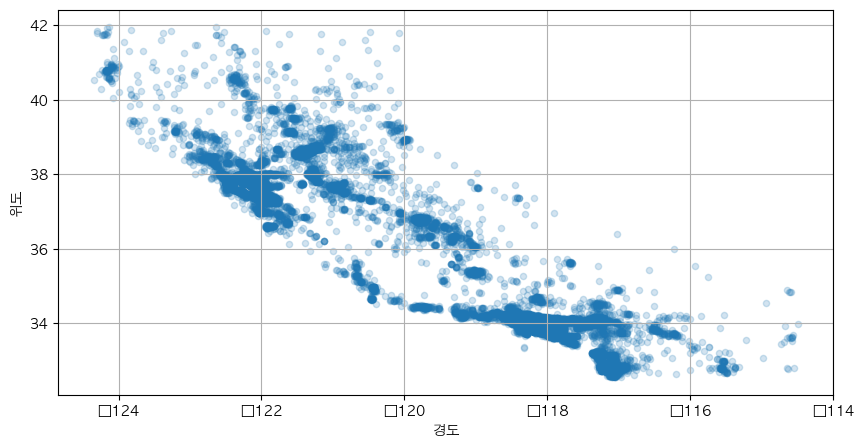

In [160]:
housing.plot(kind='scatter', x="longitude", y='latitude', grid=True, alpha = 0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


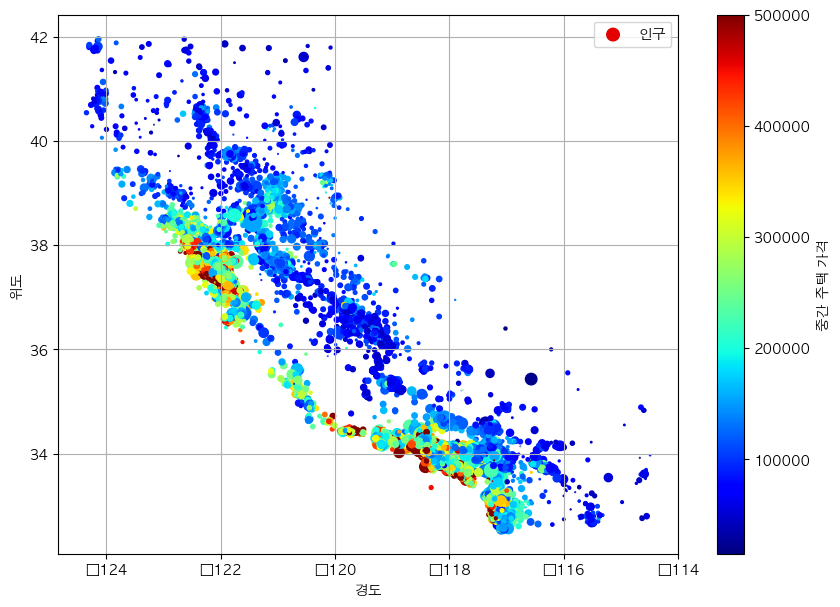

In [161]:
housing.plot(kind='scatter', x="longitude", y='latitude', grid=True,
             s=housing['population'] / 100, label='인구',
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10,7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

In [162]:
corr_matrix = housing.corr(numeric_only=True)

In [163]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

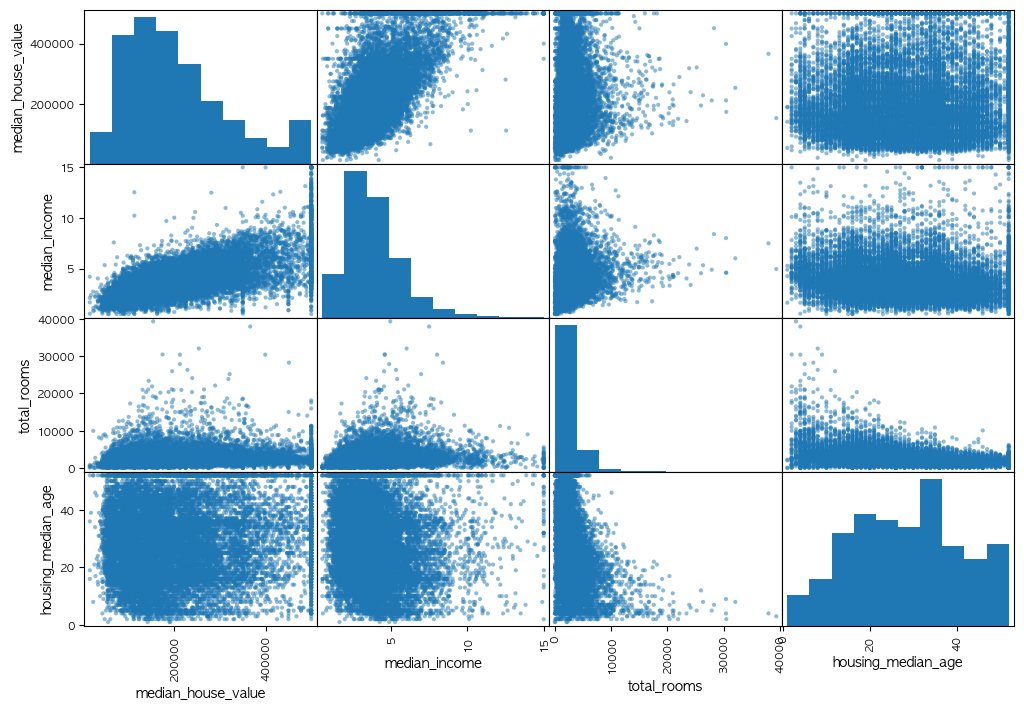

In [164]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

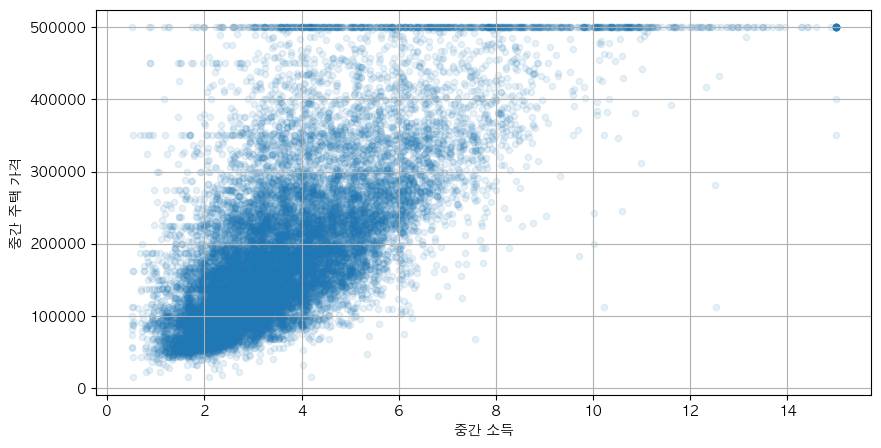

In [165]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.xlabel('중간 소득')
plt.ylabel('중간 주택 가격')
plt.show()

In [166]:
housing['room_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_house'] = housing['population'] / housing['households']

In [167]:
corr_matrix = housing.corr(numeric_only=True)

In [168]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
room_per_house          0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_ratio         -0.256397
Name: median_house_value, dtype: float64

In [169]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [170]:
# housing.dropna(subset=['total_bedrooms'], inplace=True)

# housing.drop("total_bedrooms", axis=1, inplace=True)

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [171]:
from sklearn.impute import SimpleImputer

In [172]:
impute = SimpleImputer(strategy='median')

In [173]:
housing_sum = housing.select_dtypes(include=[np.number])

In [174]:
impute.fit(housing_sum)

SimpleImputer(strategy='median')

In [175]:
impute.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [176]:
X = impute.transform(housing_sum)

In [178]:
housing_tr = pd.DataFrame(X, columns=housing_sum.columns, index=housing_sum.index)

In [179]:
housing_cat = housing[["ocean_proximity"]]

In [180]:
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [181]:
from sklearn.preprocessing import OrdinalEncoder

In [182]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [183]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [184]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [185]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [186]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [187]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [188]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [189]:
df_test = pd.DataFrame({"ocean_proximity" :["INLAND", "NEAR BAY"]})

In [190]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [191]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [192]:
df_test_unknown = pd.DataFrame({"ocean_proximity" : ["<2H OCEAN", "ISLAND"]})

In [193]:
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [194]:
cat_encoder.handle_unknown = "ignore"

In [195]:
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [199]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [200]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(), 
                         index=df_test_unknown.index)

In [203]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_sum)

In [204]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_sum)

In [205]:
from sklearn.metrics.pairwise import rbf_kernel

age_siml_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

In [206]:
age_siml_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
some_new_data = housing[['median_income']].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [209]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[['median_income']], housing_labels)
predictions = model.predict(some_new_data)

In [210]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[['population']])

In [211]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_siml_35 = rbf_transformer.transform(housing[['housing_median_age']])

In [212]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])

In [213]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]]/ X[:, [1]])

In [214]:
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        
    def fit(self, X, y=None): # 사용하지 않더라도 y를 넣어야 합니다.
        X = check_array(X) # X가 부동소주점 배열인지 확인합니다.
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # 모든 추정기는 fit()에서 이를 저장합니다.
        return self                      # 항상 self를 반환합니다!
    
    def transform(self, X):
        check_is_fitted(self) # (훈련으로) 학습된 속성이 있는지 확인합니다.
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [221]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None, n_init=10):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        self.n_init = n_init
        
    def fit(self, X, y=None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state, n_init=self.n_init)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # 항상 self를 반환합니다!
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

In [222]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight=housing_labels)

In [223]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])